In [60]:
# We import the necessary libraries and set the verbosity of the fit function

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload
import pandas as pd

fit_verbosity = 1

In [61]:
# We load the training dataset and the test dataset :

data_train = pd.read_csv('data/training.csv')

In [62]:
# We must separate the inputs from the outputs
y_train = data_train.iloc[:,:-1]

#We convert the data to numpy arrays
y_train = np.array(y_train)

#We check the shape of the data and the first sample
print(y_train.shape)
print(y_train[0])

# Now we normalize the data
y_train = y_train/255

# We check the normalization
print(y_train[0])

(7049, 30)
[66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]
[0.25895515 0.15295009 0.11853728 0.14283011 0.2336552  0.15548009
 0.28678567 0.15674509 0.14257479 0.1466251  0.09197205 0.1466251
 0.22334613 0.11385744 0.31461619 0.12638486 0.15775533 0.1137346
 0.06414266 0.11626459 0.17419832 0.22379138 0.2399816  0.31360849
 0.11221371 0.30348625 0.16985334 0.28602141 0.16914003 0.33131676]


In [63]:
# We separate the inputs from the outputs
x_train = data_train.iloc[:,-1]

# We convert the data to numpy arrays
x_train = np.array(x_train)
x_train = x_train.reshape(-1,1)

#We have a list of numbers in one str, we must separate all the numbers to have a list of lists
x_train = [x.split() for x in x_train[:,0]]

#Now we have 7049 images but store in a list of 9216 numbers, we must reshape the list to have a list of 7049 images of 96x96 pixels
x_train = np.array(x_train).reshape(-1,96,96,1)

# All the data are str and not int, we must convert them to int
x_train = x_train.astype(int)

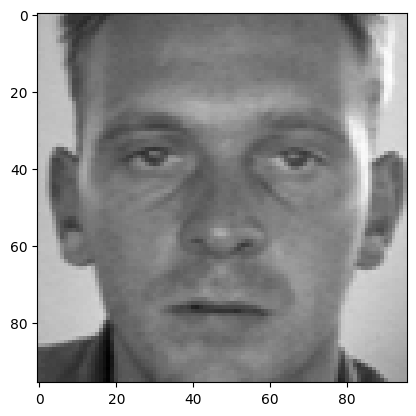

In [78]:
# We can plot the array as image to check is all is correct : 
exemple_image = x_train[343,:,:,0]
plt.imshow(exemple_image, cmap='gray')

In [65]:
# Now we can normalize the data : 
x_train = x_train/255
print(x_train[35,:,:,0])

[[0.38039216 0.35294118 0.34117647 ... 0.40784314 0.41960784 0.4627451 ]
 [0.34117647 0.33333333 0.33333333 ... 0.39215686 0.36470588 0.37254902]
 [0.34901961 0.34117647 0.34117647 ... 0.39607843 0.39607843 0.40784314]
 ...
 [0.36470588 0.23529412 0.16862745 ... 0.20784314 0.24313725 0.25098039]
 [0.4627451  0.29019608 0.23529412 ... 0.20392157 0.21960784 0.24313725]
 [0.41960784 0.31372549 0.25490196 ... 0.18823529 0.20392157 0.21568627]]


In [ ]:
#Before create the model we must load the test data to check the model after the training
data_test = pd.read_csv('data/test.csv')
data_test = np.array(data_test)
x_test = data_test[:,1]
x_test = [x.split() for x in x_test]
x_test = np.array(x_test).reshape(-1,96,96,1)
x_test = x_test.astype(int)

x_test = x_test/255


In [71]:
#Now, we are going to create the model

model = keras.Sequential()

# We add the first convolutional layer
model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(96,96,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Dropout(0.2))

# We add the second convolutional layer
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Dropout(0.2))

# We add the third convolutional layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
# model.add(keras.layers.Dropout(0.2))

#We can now flatten the data to feed the dense layer
model.add(keras.layers.Flatten())

# We add denses layers with 30 neurons because we have 30 outputs
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(30, activation='softmax'))



In [72]:
#We can now compile the model : 

model.compile(optimizer='adam',loss='mae',metrics=['accuracy'])

In [73]:
#You want to describe your mode, execute the following line :
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 94, 94, 8)         80        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 47, 47, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 22, 22, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 32)      

In [75]:
# We can set the learning rate :
K.set_value(model.optimizer.learning_rate, 0.001)
print("Learning rate is:", model.optimizer.learning_rate.numpy())

# We train the model ! 
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    verbose=fit_verbosity)

Learning rate is: 0.001
Epoch 1/10
 5/50 [==>...........................] - ETA: 2s - loss: nan - accuracy: 0.0063

KeyboardInterrupt: 